### 1. Chargement du dataset et visualisation de ce dernier

In [78]:
import pandas as pd

df = pd.read_csv("dataset.csv", index_col="ID", sep=";")
df

,PAT_SEX,PAT_AGE,VAL_I1,VAL_I2,VAL_C1,VAL_PM1,VAL_PM2,VAL_M1,VAL_M2,VAL_M3
ID,,,,,,,,,,
1,2,4.58,C,C,C,C,B,E,B,0
2,2,8.26,G,G,E,E,D,G,D,0
3,2,9.04,H,H,F,E,E,G,D,0
4,2,9.86,H,H,F,F,E,H,E,0
5,2,10.35,H,H,F,F,E,G,E,0
...,...,...,...,...,...,...,...,...,...,...
7431,1,15.89,H,H,H,H,NaN,H,H,D
7432,2,12.73,H,H,G,G,F,H,F,C
7434,1,8.39,H,H,F,E,E,G,E,B


### 2. Pour chacune des caractéristiques (hors sexe), calculer la moyenne et l’écart-type des valeurs. Proposer une visualisation de ces statistiques

In [79]:
age_moy = df[["PAT_AGE"]].mean()
age_ecart = df[["PAT_AGE"]].std()
print("L'age moyen est de ", age_moy, "l'écart type est de ", age_ecart)

L'age moyen est de  PAT_AGE    12.329045
dtype: float64 l'écart type est de  PAT_AGE    5.25424
dtype: float64


In [80]:
# Concernant la moyenne et l'écart types pour les autres valeurs, nous ne pouvons pas les calculer étant donné que 
# les valeurs ne sont pas des int. Pour cela, nous avons donné à chaque lettres un indices de maturité 
# Ex : A = 2, B = 3 etc...

df = df.replace({'A': 2, 'B':3, 'C':4,'D': 5,'E': 6,'F': 7,'G': 8,'H': 9})
df["VAL_M3"] = pd.to_numeric(df["VAL_M3"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 1 to 7436
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PAT_SEX  2847 non-null   int64  
 1   PAT_AGE  2847 non-null   float64
 2   VAL_I1   2530 non-null   float64
 3   VAL_I2   2573 non-null   float64
 4   VAL_C1   2672 non-null   float64
 5   VAL_PM1  2682 non-null   float64
 6   VAL_PM2  2493 non-null   float64
 7   VAL_M1   2611 non-null   float64
 8   VAL_M2   2654 non-null   float64
 9   VAL_M3   1750 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 244.7 KB


In [81]:
print(df)

# On fait un drop afin de supprimer la colonne PAT_SEX et on fait cela avec un nouveau dataframe
df1 = df.drop(columns=['PAT_SEX'])
moyenne = df1.mean()
ecart_types = df1.std()

print("Moyenne : \n", moyenne, "Écart Types :\n", ecart_types)

      PAT_SEX  PAT_AGE  VAL_I1  VAL_I2  VAL_C1  VAL_PM1  VAL_PM2  VAL_M1  \
ID                                                                         
1           2     4.58     4.0     4.0     4.0      4.0      3.0     6.0   
2           2     8.26     8.0     8.0     6.0      6.0      5.0     8.0   
3           2     9.04     9.0     9.0     7.0      6.0      6.0     8.0   
4           2     9.86     9.0     9.0     7.0      7.0      6.0     9.0   
5           2    10.35     9.0     9.0     7.0      7.0      6.0     8.0   
...       ...      ...     ...     ...     ...      ...      ...     ...   
7431        1    15.89     9.0     9.0     9.0      9.0      NaN     9.0   
7432        2    12.73     9.0     9.0     8.0      8.0      7.0     9.0   
7434        1     8.39     9.0     9.0     7.0      6.0      6.0     8.0   
7435        1     6.25     NaN     NaN     NaN      NaN      NaN     NaN   
7436        2    15.10     9.0     9.0     9.0      9.0      8.0     9.0   

      VAL_M

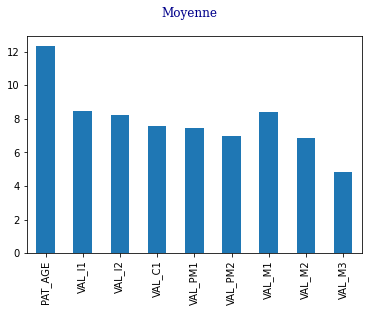

In [82]:
# Visualisation graphique pour la moyenne 
import matplotlib.pyplot as plt

plt.suptitle("Moyenne", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
moy_graph = moyenne.plot.bar()

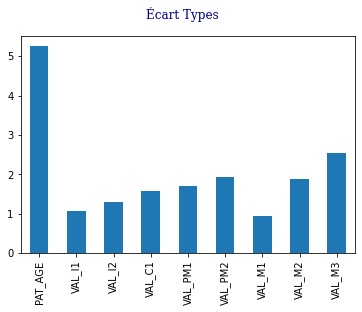

In [83]:
# Visualisation graphique pour l'Écart types
plt.suptitle("Écart Types", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
ecart_graph = ecart_types.plot.bar()

### 3.Pour chacune des caractéristiques, afficher la distribution des valeurs. Que pensez-vous de ces distributions ?

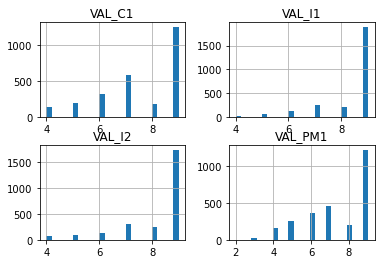

In [99]:
test = df1[['VAL_I1', 'VAL_I2', 'VAL_C1', 'VAL_PM1']].hist(bins=25)

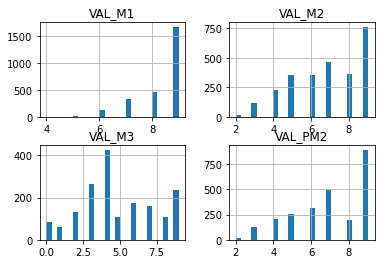

In [100]:
test = df1[['VAL_PM2', 'VAL_M1', 'VAL_M2', 'VAL_M3']].hist(bins=25)

In [86]:
# Nous observons globalement, et ce pour quasiment la totalité des caractéristique, une domination claire de
# l'élement 9 ( à savoir H).
# Nous observons une distribution Gausienne pour la plupart, mis à part pour VAL_M1 où nous abservons une distri
# -bution exponnetielle.

## 4. Vous devriez avoir remarqué qu’un certain nombre de données sont marquées NULL car non renseignées. Proposer une ou plusieurs méthodes permettant de remplacer ces données par une valeur cohérente vis-à-vis du dataset. Ces méthodes peuvent varier d’une caractéristique à l’autre.

In [93]:
# Remplacer les NaN par les valeurs en fonction des distributions ? 

# On remplace les NaN de chaque colonne par la moyenne de celle ci.

df2=df.fillna(df.mean())
# On arrondi ensuite 
round(df2)

,PAT_SEX,PAT_AGE,VAL_I1,VAL_I2,VAL_C1,VAL_PM1,VAL_PM2,VAL_M1,VAL_M2,VAL_M3
ID,,,,,,,,,,
1,2,5.0,4.0,4.0,4.0,4.0,3.0,6.0,3.0,0.0
2,2,8.0,8.0,8.0,6.0,6.0,5.0,8.0,5.0,0.0
3,2,9.0,9.0,9.0,7.0,6.0,6.0,8.0,5.0,0.0
4,2,10.0,9.0,9.0,7.0,7.0,6.0,9.0,6.0,0.0
5,2,10.0,9.0,9.0,7.0,7.0,6.0,8.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7431,1,16.0,9.0,9.0,9.0,9.0,7.0,9.0,9.0,5.0
7432,2,13.0,9.0,9.0,8.0,8.0,7.0,9.0,7.0,4.0
7434,1,8.0,9.0,9.0,7.0,6.0,6.0,8.0,6.0,3.0


## 5. En réutilisant les fonctions développées dans les besoins 2 et 3, évaluer l’impact de ces méthodes sur le dataset.

In [94]:
df3 = df2.drop(columns=['PAT_SEX'])
moyenne_v2 = df3.mean()
ecart_types_v2 = df3.std()

print("Moyenne : \n", moyenne_v2, "Écart Types :\n", ecart_types_v2)

Moyenne : 
 PAT_AGE    12.329045
VAL_I1      8.463241
VAL_I2      8.232414
VAL_C1      7.584955
VAL_PM1     7.445936
VAL_PM2     6.991978
VAL_M1      8.388357
VAL_M2      6.854559
VAL_M3      4.856571
dtype: float64 Écart Types :
 PAT_AGE    5.254240
VAL_I1     1.004747
VAL_I2     1.240426
VAL_C1     1.523385
VAL_PM1    1.655573
VAL_PM2    1.806897
VAL_M1     0.904468
VAL_M2     1.810590
VAL_M3     1.986691
dtype: float64


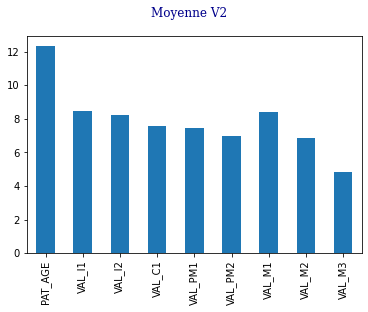

In [95]:
plt.suptitle("Moyenne V2", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
moy_graph_v2 = moyenne_v2.plot.bar()

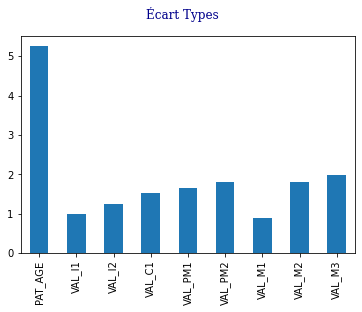

In [96]:
plt.suptitle("Écart Types", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
ecart_graph = ecart_types_v2.plot.bar()

Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa523192d00>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5234768e0>]]


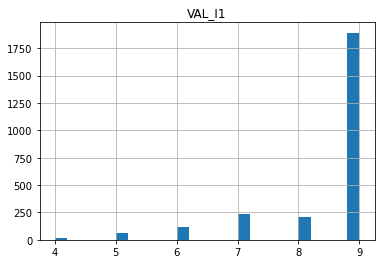

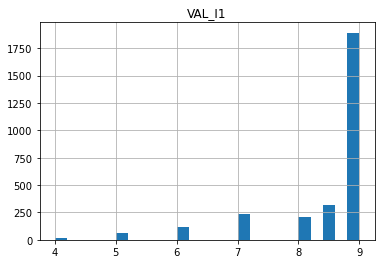

In [103]:
#test_v2 = df3[['VAL_I1', 'VAL_I2', 'VAL_C1', 'VAL_PM1']].hist(bins=25)
print("Avant manipulation des NaN : " ,df1[['VAL_I1']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_I1']].hist(bins=25))

Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa524bc0280>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa52572b940>]]


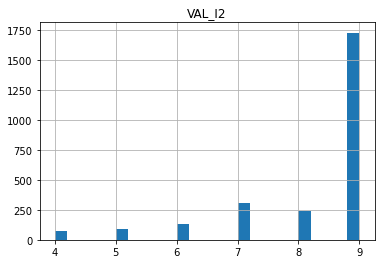

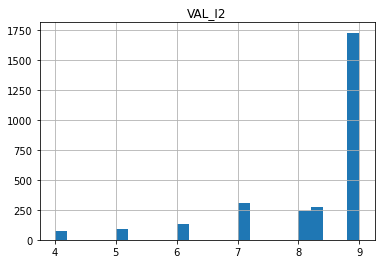

In [104]:
print("Avant manipulation des NaN : " ,df1[['VAL_I2']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_I2']].hist(bins=25))




Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa525a21fd0>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa52424df40>]]


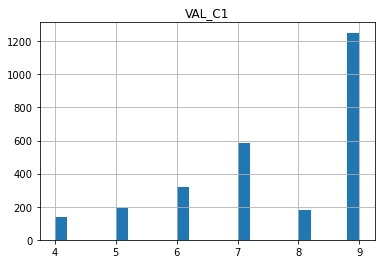

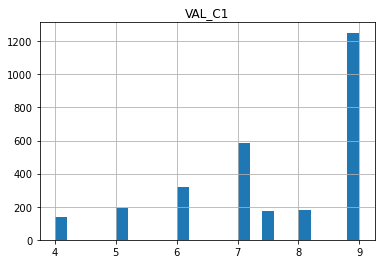

In [105]:
print("Avant manipulation des NaN : " ,df1[['VAL_C1']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_C1']].hist(bins=25))




Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5262e7b50>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5262fb790>]]


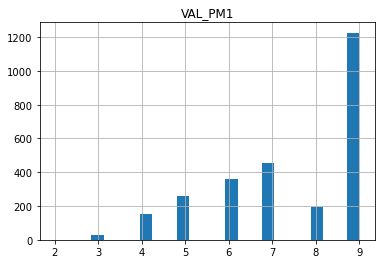

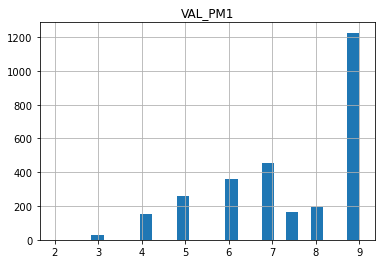

In [106]:
print("Avant manipulation des NaN : " ,df1[['VAL_PM1']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_PM1']].hist(bins=25))



Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5240cc070>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa523df44f0>]]


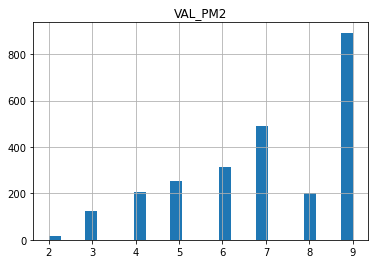

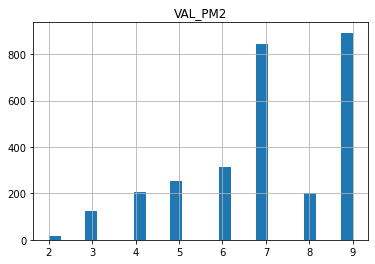

In [107]:
print("Avant manipulation des NaN : " ,df1[['VAL_PM2']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_PM2']].hist(bins=25))



Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa521ff21c0>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5241849d0>]]


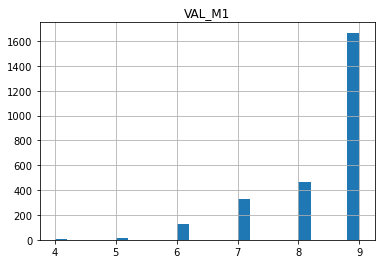

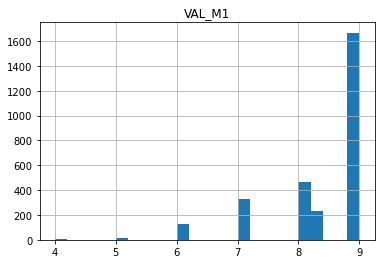

In [108]:
print("Avant manipulation des NaN : " ,df1[['VAL_M1']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_M1']].hist(bins=25))



Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5234172b0>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa523427ac0>]]


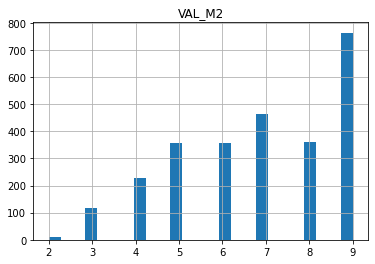

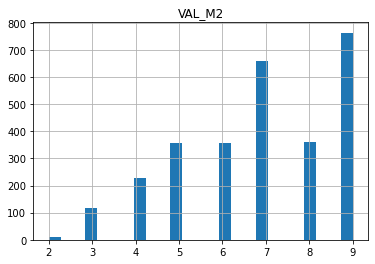

In [109]:
print("Avant manipulation des NaN : " ,df1[['VAL_M2']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_M2']].hist(bins=25))



Avant manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa520f05f40>]] Apres manipulation des NaN :  [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa52482b1f0>]]


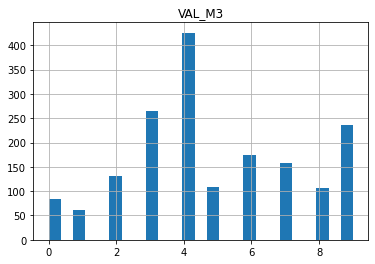

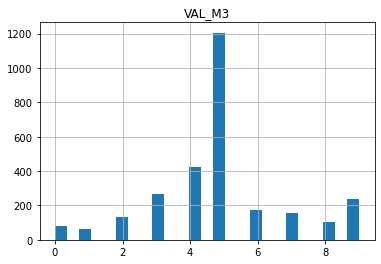

In [110]:
print("Avant manipulation des NaN : " ,df1[['VAL_M3']].hist(bins=25), "Apres manipulation des NaN : " ,df3[['VAL_M3']].hist(bins=25))



In [111]:
# Concernant les moyennes et les écarts types, les manipulations faites précédement ne change pas de façon 
# significative les représentations graphiques.

# Cependant, pour les distributions, on remarque

## 6. Développer un algorithme permettant de diviser le dataset en 2 dataset : 1 pour l’entrainement des futurs algorithmes de machine learning et l’autre pour leur évaluation sur des données jamais vu au précédent. Pour cela, l’algorithme :
     - Prend en entrée : le dataset, la répartition de la division (par exemple 70% pour l’entrainement et 30% pour l’évaluation)
     - Retourne : 2 datasets (entrainement et évaluation)
     - Contraintes :
         o Une ligne de données ne peut être présente que dans un et un seul dataset de sortie,
         o La répartition doit être complètement aléatoire et différente à chaque appel de la fonction,
         o L’algorithme doit être parfaitement utilisable quel que soit le dataset.